# Measuring the Josephson Current, the gap voltage and the normal state resistance at 687ohm 
** **
 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import math

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/687_one_pass.csv", sep = " ", header = None)

#Preview the data
df.head()

,0,1,2
0,7.944,60.7052,0.00307
1,7.789,59.2781,0.00300
2,7.605,57.6232,0.00292
3,7.393,56.3093,0.00285
4,7.196,54.6864,0.00277


## Data wrangling

In [4]:
#Ascribe the columns to the V and I varibles 
V = list(df[0])
I = list(df[1])

#Preview the data
print("V = ", V)
print("I = ", I )

V =  [7.944, 7.789, 7.605, 7.393, 7.196, 6.998, 6.786, 6.652, 6.433, 6.27, 6.066, 5.875, 5.691, 5.529, 5.353, 5.162, 4.992, 4.837, 4.618, 4.505, 4.322, 4.166, 3.997, 3.827, 3.672, 3.524, 3.347, 3.206, 2.98, 2.747, 2.726, 2.726, 2.697, 2.683, 2.683, 2.683, 2.669, 2.655, 2.655, 2.641, 2.634, 2.613, 2.613, 2.584, 2.5, 0.106, 0.106, 0.106, 0.099, 0.085, 0.099, 0.085, 0.106, 0.092, -1.37, -2.45, -2.457, -2.464, -2.479, -2.493, -2.493, -2.521, -2.535, -2.712, -2.923, -3.114, -3.269, -3.453, -3.594, -3.792, -3.912, -4.131, -4.272, -4.456, -4.639, -4.802, -5.007, -5.19, -5.402, -5.586, -5.797, -5.995, -6.2, -6.398, -6.602, -6.793, -7.033, -7.217, -7.429, -7.626, -7.824, -7.782, -7.429, -7.061, -6.737, -6.454, -6.129, -5.811, -5.501, -5.24, -4.908, -4.668, -4.343, -4.096, -3.792, -3.566, -3.255, -3.015, -2.62, -2.592, -2.57, -2.521, -2.535, -2.521, -2.507, -2.464, -2.464, -2.253, 0.035, 0.042, 0.049, 0.049, 0.049, 2.599, 2.613, 2.613, 2.627, 2.641, 2.669, 2.782, 3.164, 3.389, 3.658, 3.898, 4.15

In [5]:
#Function that returns the index of the last occurrence of an item in a list
def find_last_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            last_occurrence = i
    return last_occurrence

lower_limit = find_last_occurrence(0.049, V)
upper_limit = find_last_occurrence(5.473, V)

print(lower_limit)
print(upper_limit)

122
139


In [6]:
#Remove the data above the chosen upper limit to enhance the view and focus on the single forward pass
V = np.array(V[lower_limit:upper_limit])

I = np.array(I[lower_limit:upper_limit])

#Preview the new subsets
print("V = ", V)
print("I = ", I)

V =  [0.049 2.599 2.613 2.613 2.627 2.641 2.669 2.782 3.164 3.389 3.658 3.898
 4.152 4.435 4.717 4.95  5.211]
I =  [ 6.98    8.7373 10.5007 12.2648 14.4382 16.0809 18.167  20.0368 22.187
 24.3154 26.5359 28.5073 30.8029 32.6352 34.9327 37.1668 39.1711]


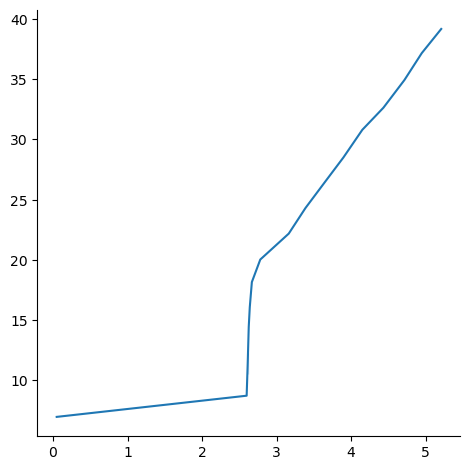

In [7]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Preview the data
sns.relplot(x = V, y = I, kind = "line")

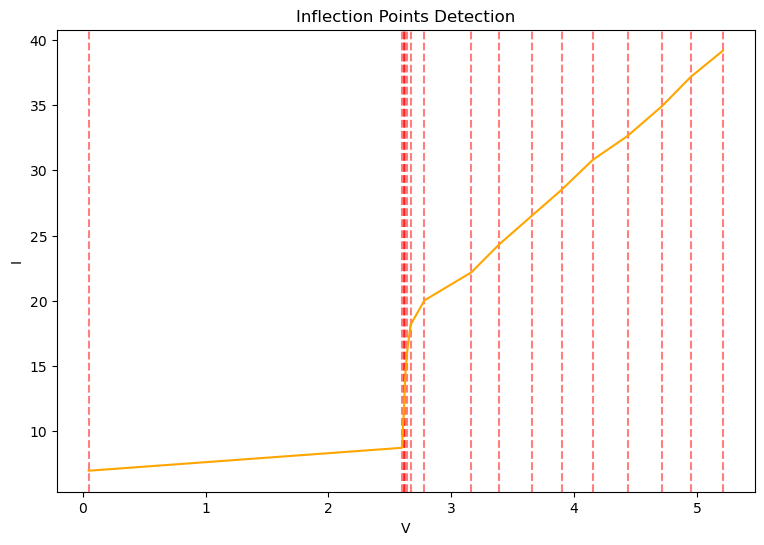

In [8]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the data
V = np.array(V)
I = np.array(I)


# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.01:
        change_points.append(i)

# Mark the change points on the plot
for point in change_points:
    plt.axvline(V[point], color='r', linestyle='--', alpha=0.5)

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

### Clear the graph above to focus on Ic and Vc

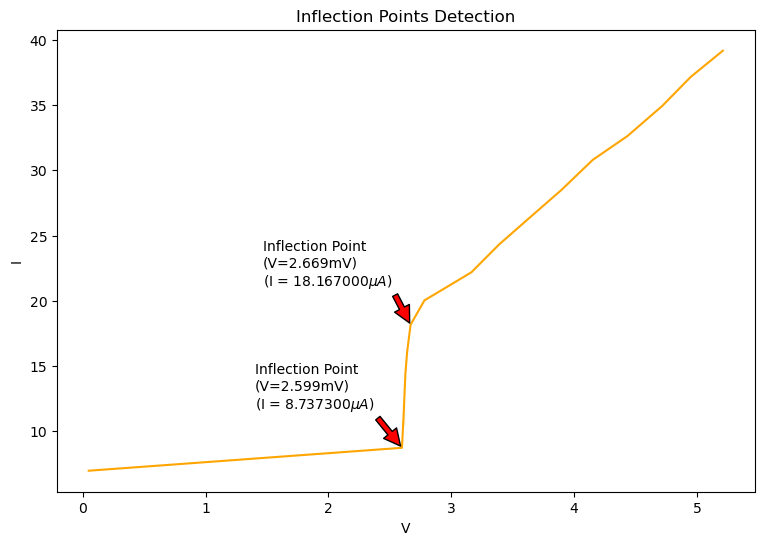

In [9]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.01:
        change_points.append(i)

# Annotate inflection points on the graph
for idx, point in enumerate(change_points):
    if idx in [1, 6]:
        plt.annotate(f'Inflection Point\n(V={V[point]:.3f}mV)\n(I = {np.interp(V[point], V, I):3f}$\mu A$)', 
                     xy=(V[point], np.interp(V[point], V, I)),
                     xytext=(V[point] - 1.2, np.interp(V[point], V, I) + 3),
                     arrowprops={'facecolor': 'red', 'shrink': 0.05})

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

# Estimating the normal state resistance (Rn)

In [10]:
#Preview the main dataset
print(list(df[0]))

[7.944, 7.789, 7.605, 7.393, 7.196, 6.998, 6.786, 6.652, 6.433, 6.27, 6.066, 5.875, 5.691, 5.529, 5.353, 5.162, 4.992, 4.837, 4.618, 4.505, 4.322, 4.166, 3.997, 3.827, 3.672, 3.524, 3.347, 3.206, 2.98, 2.747, 2.726, 2.726, 2.697, 2.683, 2.683, 2.683, 2.669, 2.655, 2.655, 2.641, 2.634, 2.613, 2.613, 2.584, 2.5, 0.106, 0.106, 0.106, 0.099, 0.085, 0.099, 0.085, 0.106, 0.092, -1.37, -2.45, -2.457, -2.464, -2.479, -2.493, -2.493, -2.521, -2.535, -2.712, -2.923, -3.114, -3.269, -3.453, -3.594, -3.792, -3.912, -4.131, -4.272, -4.456, -4.639, -4.802, -5.007, -5.19, -5.402, -5.586, -5.797, -5.995, -6.2, -6.398, -6.602, -6.793, -7.033, -7.217, -7.429, -7.626, -7.824, -7.782, -7.429, -7.061, -6.737, -6.454, -6.129, -5.811, -5.501, -5.24, -4.908, -4.668, -4.343, -4.096, -3.792, -3.566, -3.255, -3.015, -2.62, -2.592, -2.57, -2.521, -2.535, -2.521, -2.507, -2.464, -2.464, -2.253, 0.035, 0.042, 0.049, 0.049, 0.049, 2.599, 2.613, 2.613, 2.627, 2.641, 2.669, 2.782, 3.164, 3.389, 3.658, 3.898, 4.152, 4.

In [11]:
#The dataset includes points from two complete sweeps
#Identify the index of the approximate limits of the normal state on the positive side of the graph 

def find_last_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            last_occurrence = i
    return last_occurrence

low_limit = find_last_occurrence(2.669, list(df[0])) #the second change point above
up_limit = list(df[0]).index(df[0].max())


print(low_limit) 
print(up_limit)

128
148


In [12]:
#Select data from the first pass
V_n = np.array(df[0][low_limit:up_limit])
I_n = np.array(df[1][low_limit:up_limit])

#Preview the data
print(V_n)
print(I_n)

[2.669 2.782 3.164 3.389 3.658 3.898 4.152 4.435 4.717 4.95  5.211 5.473
 5.769 6.073 6.334 6.687 6.97  7.252 7.549 7.859]
[18.167  20.0368 22.187  24.3154 26.5359 28.5073 30.8029 32.6352 34.9327
 37.1668 39.1711 41.6501 43.7239 46.1606 48.5871 50.9406 53.2607 56.0296
 58.3913 60.8881]


## Define the model and fit the data

In [13]:
#Define the variables and convert to Volts and Amps
x = V_n / 0.001
y = I_n / 0.000001

#Use builtin NameModel, specify prefix for each:
mod = LinearModel(prefix='') 

#Set the initial parameters to 'guess' mode
pars  = mod.guess(y, x = x)

#Fit with weights=1/yerr
result = mod.fit(y, pars, x = x, weights= 1. / (y * 0.01014))

#Print the fit results
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 20
    # variables        = 2
    chi-square         = 18.0139283
    reduced chi-square = 1.00077380
    Akaike info crit   = 1.90825963
    Bayesian info crit = 3.89972417
    R-squared          = 1.00000000
[[Variables]]
    slope:      8152.08657 +/- 52.2849641 (0.64%) (init = 8158.212)
    intercept: -3281997.44 +/- 224191.210 (6.83%) (init = -3306615)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9466


## Plot the model

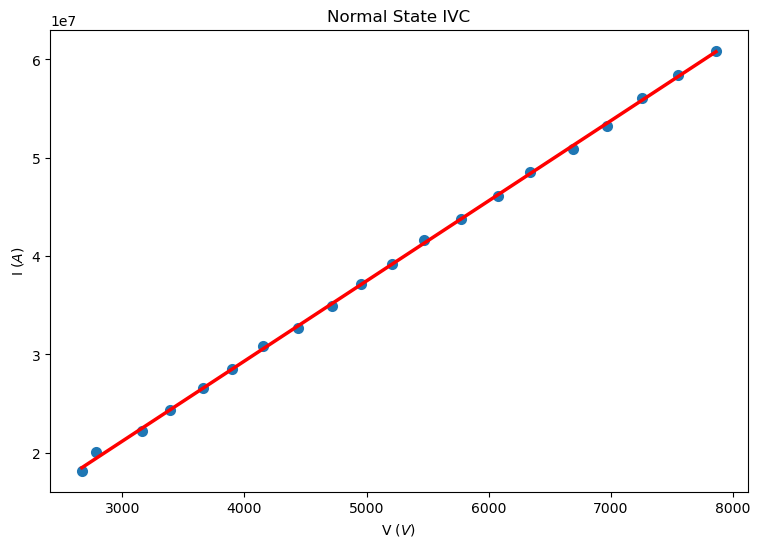

In [14]:
#Set the figure size
plt.figure(figsize = (9,6))

#Plot the data and the model
plt.scatter(x, y, linewidth=2)
plt.plot(x, result.best_fit, 'r-', linewidth=2.5)

# Set plot labels and title
plt.xlabel('V ($V$)')
plt.ylabel('I ($A$)')
plt.title('Normal State IVC')

#Show the plot
plt.show()

# Calculating the theoretical Ic and V_gap

![](./img/Ic_formula.png)

In [15]:
#Access the model parameters
varys = result.params.valuesdict()

varys

{'slope': 8152.086566133564, 'intercept': -3281997.441947409}

In [16]:
#The slope is equal to 1 / R 
R_n = 1 / varys.get("slope")

print('Normal state resistance: R_n = ', round(R_n, 6), 'Ohm') 

Normal state resistance: R_n =  0.000123 Ohm


In [17]:
#Define the terms for the strong and weak coupling formulas 
t_c = 9.25 #critical temperature
delta_0 = 2.25288819E-22 # from 1.764 * k_B * t_c,  [check eqn. 1 on the report paper] 
t = 5.88303658 #from the calibration curve in notebook 2
e = 1.6022E-19 #elementay charge
pi = 3.14159265358979323846264338327950 
t_red = t / t_c #the reduced temperature
k_B = 1.3807E-23 #Boltzmann constant
R_n = 1 / varys.get("slope") #from the slope of the IVC


#weak coupling formula

delta_weak = delta_0 * 1.74 * math.sqrt(1.0 - t_red)

E_weak = delta_weak * 2

V_weak = (E_weak / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_weak = (pi / 2) * (delta_weak / (e * R_n)) * math.tanh(delta_weak / (2 * k_B * t))


#strong coupling approximation

delta_strong = (delta_0) * math.sqrt(math.cos((pi * t_red**2)  / 2 )) 

E_strong = delta_strong * 2

V_strong = (E_strong / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_strong = (pi / 2) * (delta_strong / (e * R_n)) * math.tanh(delta_strong / (2 * k_B * t))


#Print the results
print('Temperature =', t, 'K')
print('-----------------------------')
print('-----------------------------')
                         
print('Weak Coupling Formula')
print('-----------------------------')


print('delta_t =', delta_weak, 'J')
print('Gap Energy =', E_weak, 'J')
print('Gap Voltage =', V_weak, 'mV')
print('Josephson Current =', Ic_weak, 'uA')
print('______________________________')
print('______________________________')
print('------------------------------')
print('Strong Coupling Approximation')
print('------------------------------')

print('delta_t =', delta_strong, 'J')
print('Gap Energy = ', E_strong, 'J')
print('Gap Voltage =', V_strong, 'mV')
print('Josephson Current =', Ic_strong, 'uA')
print('________________________________')
print('________________________________')
print('________________________________')

Temperature = 5.88303658 K
-----------------------------
-----------------------------
Weak Coupling Formula
-----------------------------
delta_t = 2.365033078303257e-22 J
Gap Energy = 4.730066156606514e-22 J
Gap Voltage = 2.952232028839417 mV
Josephson Current = 16.952064189163814 uA
______________________________
______________________________
------------------------------
Strong Coupling Approximation
------------------------------
delta_t = 2.0211320894309215e-22 J
Gap Energy =  4.042264178861843e-22 J
Gap Voltage = 2.5229460609548386 mV
Josephson Current = 13.676002246181904 uA
________________________________
________________________________
________________________________


In [18]:
#Add all the collected results to a dictionary
Josephson_data = {"Ic" : np.interp(V[6], V, I) , "Ic_weak" : round(Ic_weak, 4), "Ic_strong" : round(Ic_strong, 4), "V_gap" : V[1], "Vg_weak" : round(V_weak, 4), "Vg_strong" : round(V_strong, 4), "Temp" : round(t, 4)}

#Preview the newly created row of data
print(Josephson_data)

{'Ic': 18.167, 'Ic_weak': 16.9521, 'Ic_strong': 13.676, 'V_gap': 2.599, 'Vg_weak': 2.9522, 'Vg_strong': 2.5229, 'Temp': 5.883}


## Export the results to a csv file

In [19]:
# import csv

# with open(r'./Data/Josephson_data.csv', 'a', newline='') as csvfile:
#     fieldnames = ['Ic','Ic_weak', 'Ic_strong', 'V_gap', 'Vg_weak', 'Vg_strong', 'Temp']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     writer.writerow(Josephson_data)

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>